# KNN
***

## Importando bibliotecas

In [4]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from scipy.io import arff

# Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Análise do conjunto de dados

In [17]:

d = arff.loadarff("/content/sample_data/indian_pines.arff")
dataset = pd.DataFrame(d[0])
dataset.head()



,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,Class
0,3373.0,4124.0,4229.0,4197.0,4476.0,4824.0,4789.0,4701.0,4687.0,4504.0,...,1064.0,1060.0,1054.0,1043.0,1044.0,1022.0,1023.0,1009.0,1000.0,b'Alfalfa'
1,3028.0,3994.0,4218.0,4192.0,4423.0,4564.0,4708.0,4572.0,4563.0,4323.0,...,1058.0,1057.0,1041.0,1035.0,1029.0,1022.0,1018.0,996.0,1004.0,b'Alfalfa'
2,3202.0,4118.0,4315.0,4330.0,4723.0,4877.0,5105.0,4909.0,4909.0,4696.0,...,1086.0,1093.0,1067.0,1050.0,1050.0,1034.0,1019.0,1000.0,1004.0,b'Alfalfa'
3,3375.0,3995.0,4302.0,4112.0,4519.0,4808.0,4859.0,4763.0,4761.0,4581.0,...,1064.0,1070.0,1051.0,1041.0,1035.0,1031.0,1029.0,1004.0,1000.0,b'Alfalfa'
4,3541.0,4119.0,4213.0,4188.0,4467.0,4847.0,4897.0,4831.0,4761.0,4569.0,...,1057.0,1072.0,1048.0,1046.0,1046.0,1039.0,1010.0,1000.0,1000.0,b'Alfalfa'


In [20]:
# Coluna com as features
target_col = "Class"
print("Quantas classes existem nesse dataset?\n%d" %(len(dataset[target_col].unique())))
print("\nQuantas instâncias existem no dataset?\n%d" %(dataset.shape[0]))
print("\nQuantas features existem no dataset?\n%d" % (dataset.shape[1]-1))
print("\nQue features são essas?\n%s" % (str([k for k in dataset.keys() if k != target_col])))
print("\nQual o numero de instâncias por classe?")
print(dataset[target_col].value_counts())

Quantas classes existem nesse dataset?
8

Quantas instâncias existem no dataset?
9144

Quantas features existem no dataset?
220

Que features são essas?
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136

In [21]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,Class
0,3373.0,4124.0,4229.0,4197.0,4476.0,4824.0,4789.0,4701.0,4687.0,4504.0,...,1064.0,1060.0,1054.0,1043.0,1044.0,1022.0,1023.0,1009.0,1000.0,b'Alfalfa'
1,3028.0,3994.0,4218.0,4192.0,4423.0,4564.0,4708.0,4572.0,4563.0,4323.0,...,1058.0,1057.0,1041.0,1035.0,1029.0,1022.0,1018.0,996.0,1004.0,b'Alfalfa'
2,3202.0,4118.0,4315.0,4330.0,4723.0,4877.0,5105.0,4909.0,4909.0,4696.0,...,1086.0,1093.0,1067.0,1050.0,1050.0,1034.0,1019.0,1000.0,1004.0,b'Alfalfa'
3,3375.0,3995.0,4302.0,4112.0,4519.0,4808.0,4859.0,4763.0,4761.0,4581.0,...,1064.0,1070.0,1051.0,1041.0,1035.0,1031.0,1029.0,1004.0,1000.0,b'Alfalfa'
4,3541.0,4119.0,4213.0,4188.0,4467.0,4847.0,4897.0,4831.0,4761.0,4569.0,...,1057.0,1072.0,1048.0,1046.0,1046.0,1039.0,1010.0,1000.0,1000.0,b'Alfalfa'


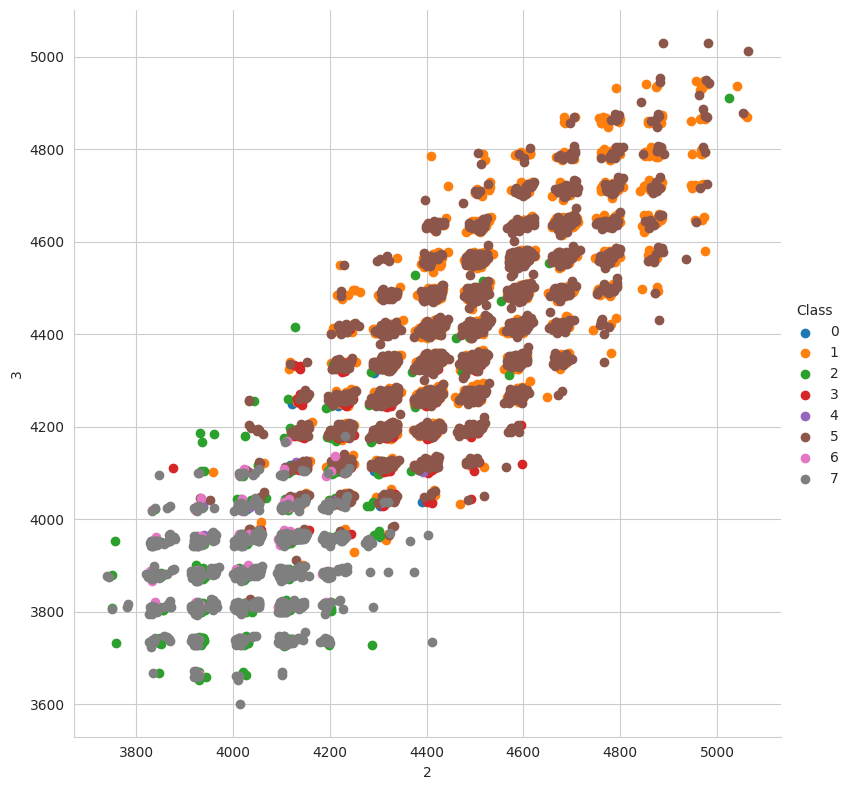

In [71]:
# Distribuição das classes por Features
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue ="Class",
              height = 8).map(plt.scatter,
                              '2',
                              '3').add_legend()


### Separando o conjunto de dados

In [73]:
#Verificando features
X = dataset.loc[:]
y = dataset.loc[:,["Class"]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Treinamento do modelo

In [80]:
# vamos criar um classificador kNN com k=5
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)

# e ver a sua performance no dataset de teste
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.81      0.79      0.80       754
           2       0.92      0.97      0.94       159
           3       0.97      0.98      0.98       149
           4       0.86      0.67      0.75         9
           5       0.87      0.88      0.88      1199
           6       0.93      0.98      0.95        63
           7       0.99      0.99      0.99       401

    accuracy                           0.88      2744
   macro avg       0.90      0.88      0.89      2744
weighted avg       0.88      0.88      0.88      2744



**Métricas**

*   **Precision** - $\frac{tp}{(tp + fp)}$
*   **Recall** - $\frac{tp}{(tp + fn)}$
*   **F1-score** - $2 * \frac{(precision * recall)}{(precision + recall)}$
*   **Accuracy** - $\frac{C}{T}$
*   **Macro avg** - Calcule as métricas para cada rótulo e encontre sua média não ponderada.
*   **Weighted avg** - Calcule as métricas para cada rótulo e encontre sua média ponderada pelo suporte (o número de instâncias verdadeiras para cada rótulo).

**tp** - verdadeiros positivos

**fp** - falsos positivos

**fn** - falsos negativos

**C** - Número de predições corretas

**T** - Número total de predições

### Região de decisão

In [58]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()

ValueError: ignored

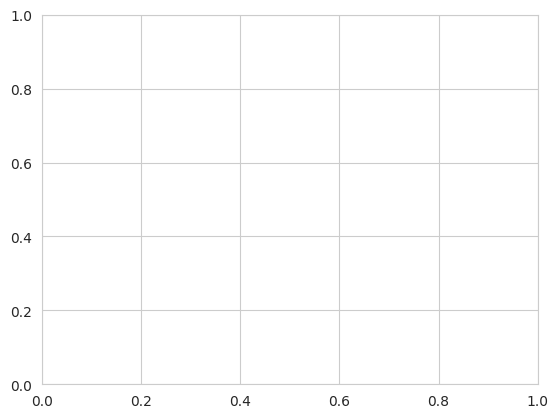

In [59]:
# região de decisão com o tamanho da vizinhança para o kNN
show_decision_region(X_test, y_test, model)

## Análise dos parâmetros

### Tamanho da vizinhança

n_neighbors <= número de exemplos  e n_neighbors >= 1

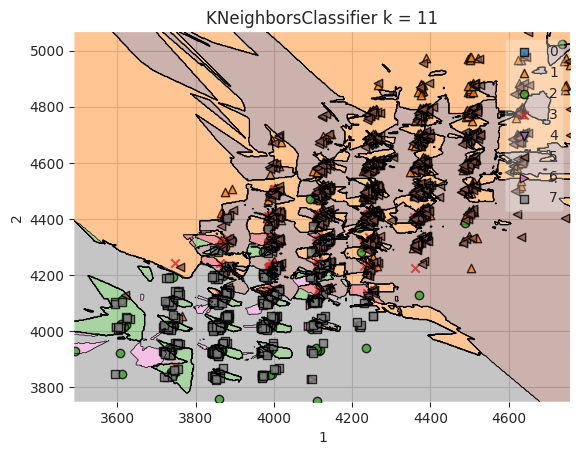

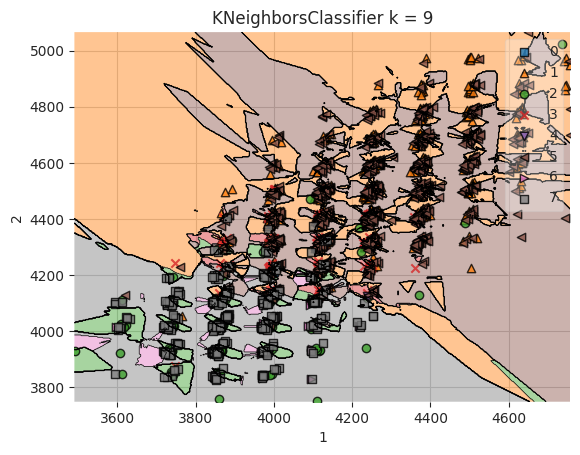

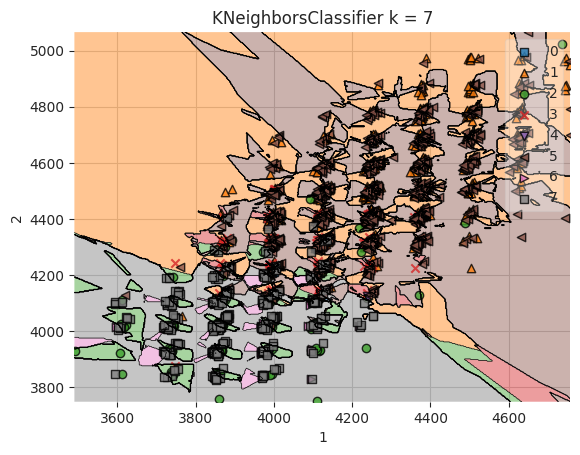

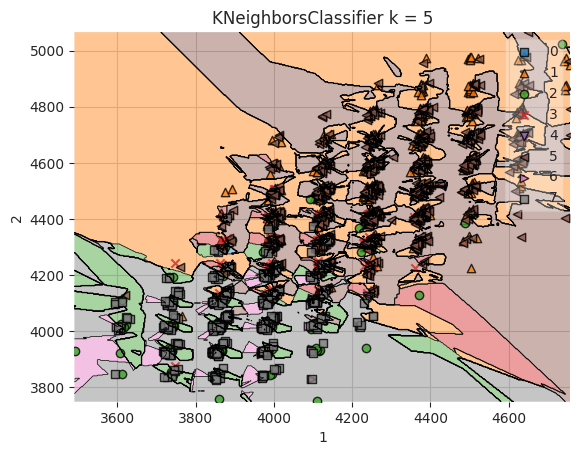

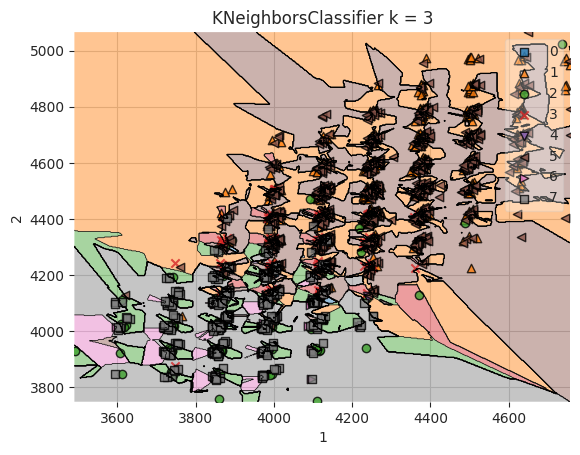

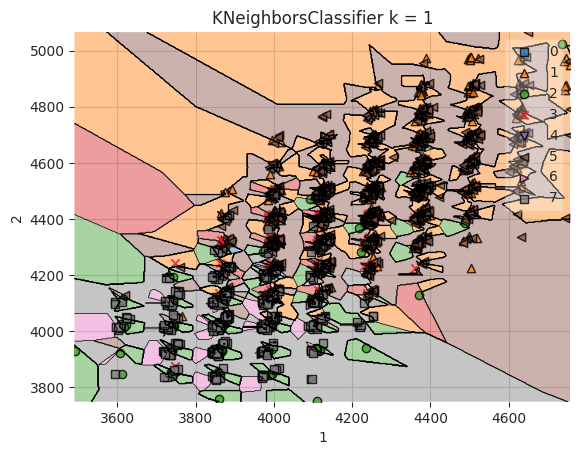

In [35]:
for k in [11, 9, 7, 5, 3, 1]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # performance no dataset de teste
    show_decision_region(X_test, y_test, model)

### Medida de distância

Também podemos mudar a métrica utilizada para calcular a distância entre as amostras.

O hiperparâmetro _metric_ pode assumir dois tipos diferentes, uma _string_ ou uma função. Caso o valor seja uma _string_, as possíveis funções de distâncias estão presentes [aqui](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html). Entretanto, você também pode criar uma função que calcula a distância entre métricas.

Vamos definir duas distâncias diferentes, a distância Euclidiana e a distância Manhattan:

- Manhattan: $D_M(x, y) = \sum_{i=1}^{d}|x_i-y_i|$

- Euclidiana: $D(x, y) = \sqrt{\sum_{i=1}^{d}(x_i-y_i)^2}$

In [ ]:
# vamos implementar a distância manhattan com pesos diferentes para cada uma das features
def manhattan_custom_distance(x, y, weights=np.array([2, 1])):
    return (abs(x - y)*weights).sum()

--------------------
euclidean
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.71      0.75      0.73        16
           2       0.64      0.58      0.61        12

    accuracy                           0.80        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.80      0.80      0.80        45



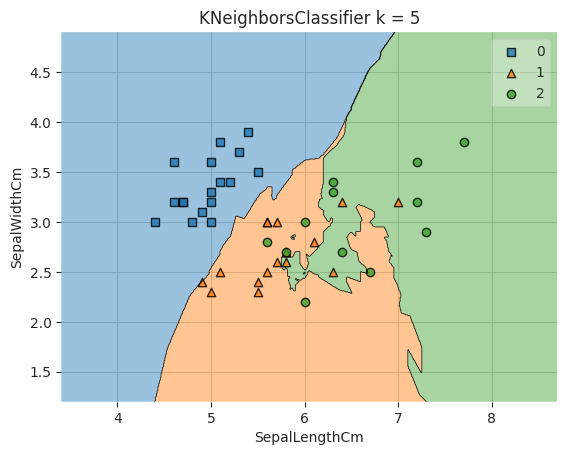

--------------------
manhattan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.71      0.75      0.73        16
           2       0.64      0.58      0.61        12

    accuracy                           0.80        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.80      0.80      0.80        45



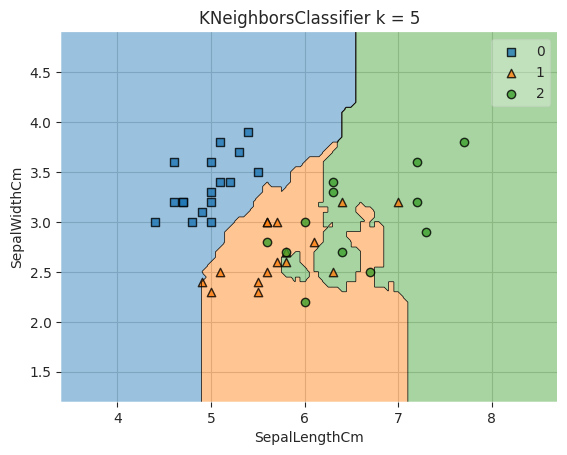

--------------------
<function manhattan_custom_distance at 0x7f1c801de7a0>
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.67      0.62      0.65        16
           2       0.64      0.58      0.61        12

    accuracy                           0.76        45
   macro avg       0.73      0.74      0.73        45
weighted avg       0.74      0.76      0.75        45



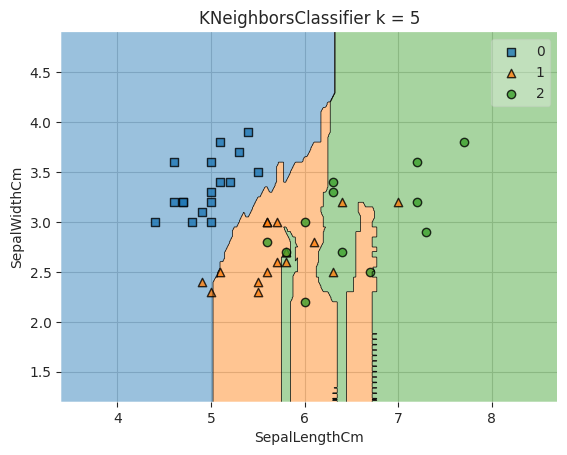

In [ ]:
for m in ["euclidean", "manhattan", manhattan_custom_distance]:
    print("-"*20)
    print(str(m))

    model = KNeighborsClassifier(n_neighbors=5, metric=m)
    model.fit(X_train, y_train)

    # performance no dataset de test
    print(classification_report(y_test, model.predict(X_test)))

    show_decision_region(X_test, y_test, model)